# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

В распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Загрузка данных

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
sns.set()

In [2]:
try:
    data = pd.read_csv('/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv(r'C:\Users\tarko\OneDrive\Рабочий стол\Анализ данных\Проекты\real_estate_data.csv', sep='\t')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Число дубликатов: 0


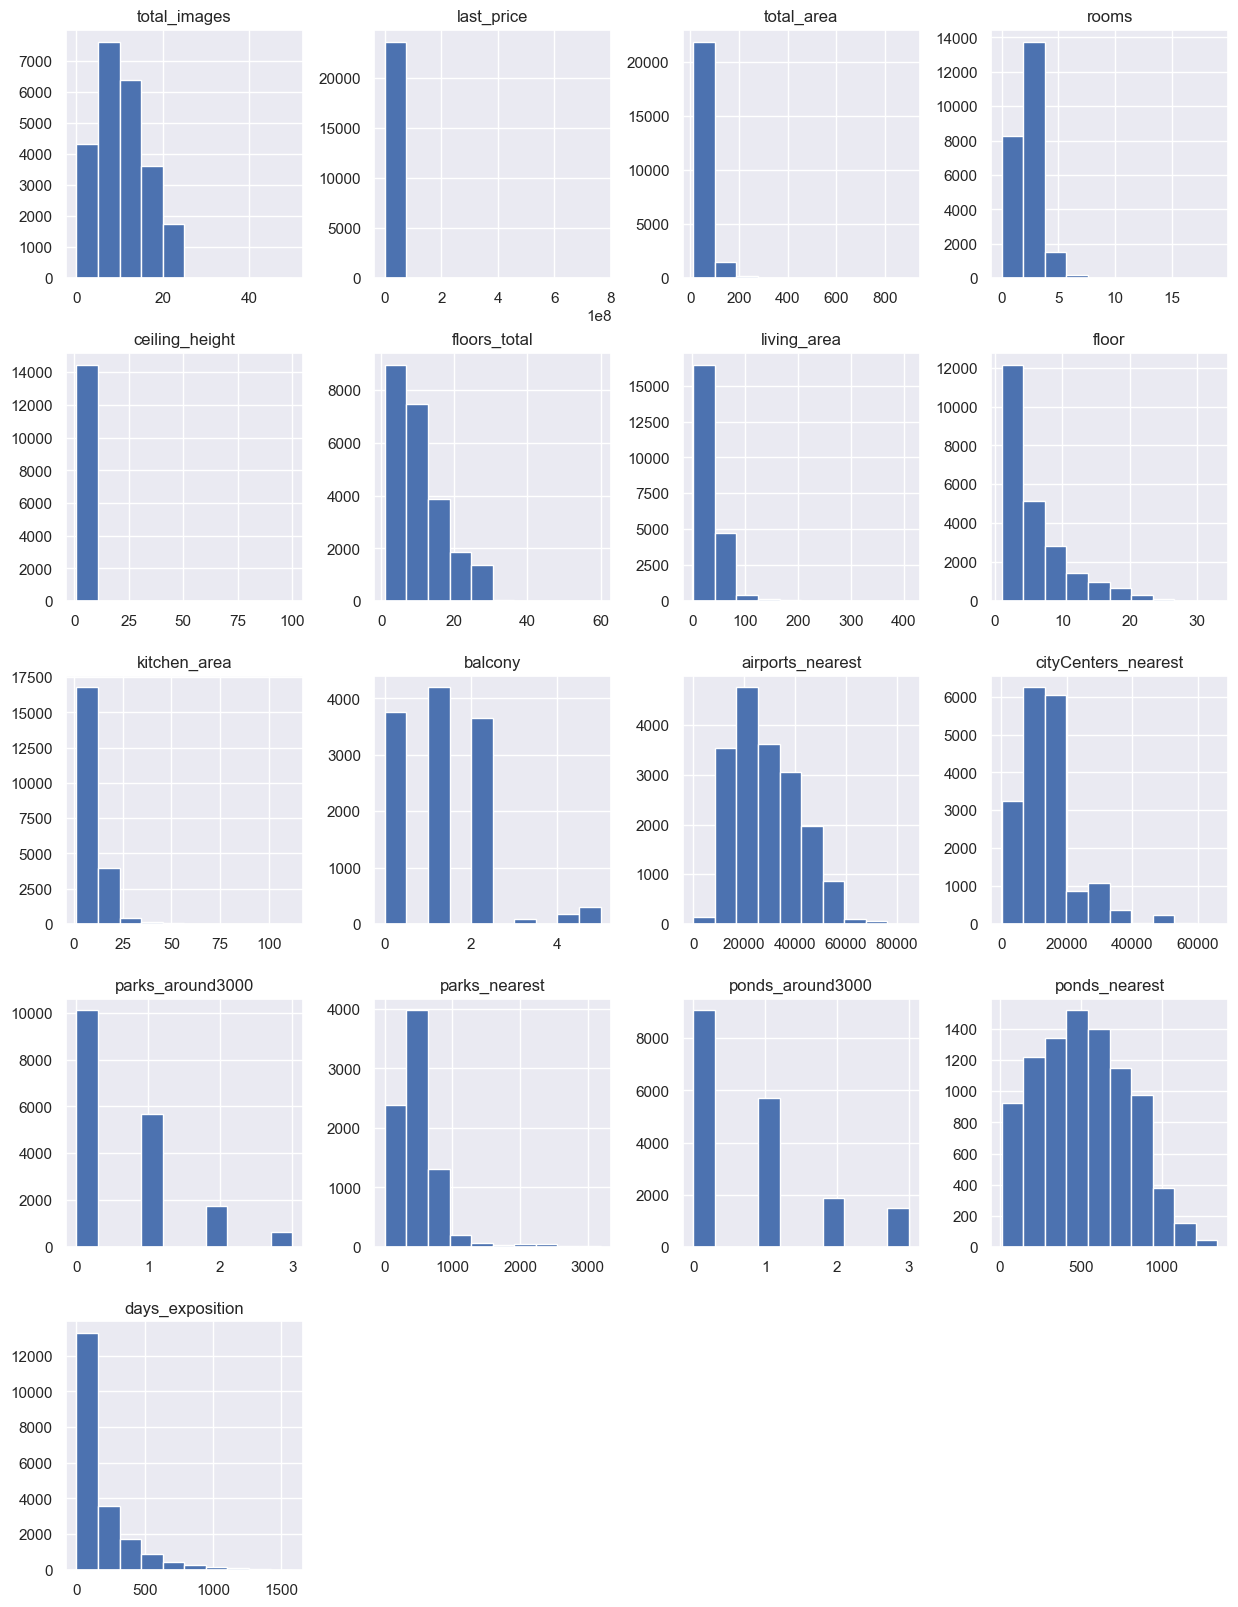

In [3]:
data.info()
display(data.head())
print('Число дубликатов:', data.duplicated().sum())
data.describe()
data.hist(figsize=(15, 20));
pd.set_option('display.max_columns', 22)

**Вывод:** Всего 23699 записи. В **data** есть пропущенные значения и некорректный тип данных. А также есть аномальные значения.

### Предобработка данных

In [4]:
print(data.isna().sum()) # ищем количество пропущенных значений в каждом столбце

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [5]:
# Приводим в целочисленный тип стоимость квартиры
data['last_price'] = data['last_price'].astype(int)
# Приводим к типу даты дату публикации
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# Проверяем количество значений в аппартаментах. Заменяем пропущенные значения на нет
data['is_apartment'] = data['is_apartment'].fillna(value=False)
# Приводим в целочисленный тип количество балконов. Заменяем пропущенные значения на 0
data['balcony'] = data['balcony'].fillna(value=0).astype(int)
# Приводим в целочисленный тип количество парков. Заменяем пропущенные значения на 0
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype(int)
# Приводим в целочисленный тип количество прудов. Заменяем пропущенные значения на 0
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype(int)

# Проверяем количество пропущенных значений
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
# Удаляем записи, где отсутствует локация и этажность
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)

# проверяем наличие неявных дубликатов
data['locality_name'].sort_values().unique()

# меняем названия всех населенных пунктов включающих слово "поселок" на "поселок"
def replace_wrong(wrong_values, correct_values):
    for wrong_value in wrong_values:
        data['locality_name'] = data['locality_name'].str.replace(wrong_value, correct_values)

wrong = ['посёлок', 'поселок городского типа', 'коттеджный поселок', 'поселок при железнодорожной станции', 'городской поселок', 'поселок станции']
correct = 'поселок'
replace_wrong(wrong, correct)

# проверяем изменение неявных дубликатов
list(data['locality_name'].sort_values().unique())

# Заменяем значения высоты потолков выше 20 метров разделенное на 10
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] / 10

# Заменяем пустые значения высоты потолков на среднее значение по всему датасету
data['ceiling_height'] = data.groupby(['locality_name', 'floors_total'], group_keys=False)['ceiling_height'].apply(lambda x: x.fillna(x.mean()))
data['ceiling_height'].fillna(data['ceiling_height'].mean(), inplace=True)

# Заменяем пустые значения жилой площади и площади кухни
living = data['living_area'].mean() / data['total_area'].mean()
kitchen = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen * data['total_area'], inplace=True)

# Проверяем количество пропущенных значений
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

### Расчеты и добавление в таблицу новых столбцов

In [7]:
# Добавляем столбец со стоимостью квадратного метра и приводим его в целочисленный тип
data['price_one_metr'] = data['last_price'] / data['total_area']
data['price_one_metr'] = data['price_one_metr'].astype(int)

# Добавляем столбцы дня недели, месяца и года
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

# Создаём функцию для заполнения нового столбца с типом этажа
def categorize(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['floor_type'] = data.apply(categorize, axis=1)

# Добавляем столбец с расстоянием до центра в км, округляем до целого
data['center_km'] = data['cityCenters_nearest'] / 1000
data['center_km'] = data['center_km'].fillna(value=0).astype(int)

# Устанавливаем маркер 9999 для пропусков в сроке продажи и приводим к целочисленному типу
data['days_exposition'].fillna(9999, inplace=True)
data['days_exposition'] = data['days_exposition'].astype(int)


display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_metr,weekday,month,year,floor_type,center_km
0,20,13000000,108.0,2019-03-07,3,2.700000,16.0,51.000000,8,False,False,...,1,482.0,2,755.0,9999,120370,3,3,2019,другой,16
1,7,3350000,40.4,2018-12-04,1,2.727710,11.0,18.600000,1,False,False,...,0,NaN,0,NaN,81,82920,1,12,2018,первый,18
2,10,5196000,56.0,2015-08-20,2,2.819553,5.0,34.300000,4,False,False,...,1,90.0,2,574.0,558,92785,3,8,2015,другой,13
3,0,64900000,159.0,2015-07-24,3,2.677951,14.0,90.816648,9,False,False,...,2,84.0,3,234.0,424,408176,4,7,2015,другой,6
4,2,10000000,100.0,2018-06-19,2,3.030000,14.0,32.000000,13,False,False,...,2,112.0,1,48.0,121,100000,1,6,2018,другой,8


### Исследовательский анализ данных

#### Изучение основных параметров

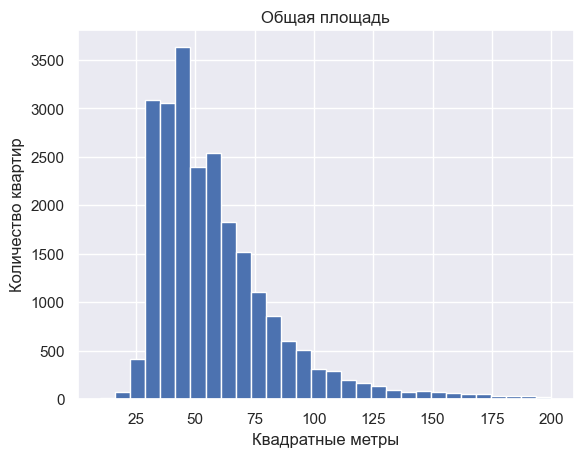

Наибольшие по общей площади квартиры:
19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
4237     517.0
8018     507.0
15016    500.0
5893     500.0
12401    495.0
Name: total_area, dtype: float64


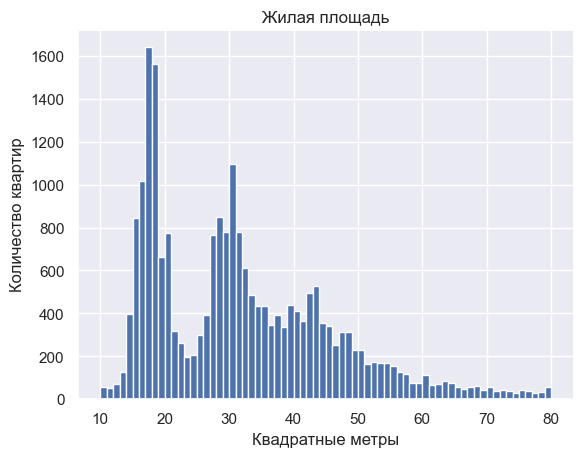

Наибольшие по жилой площади квартиры:
19540    409.700000
5358     409.000000
3117     360.410721
12401    347.500000
4237     332.000000
12859    322.300000
660      312.500000
8018     301.500000
14088    300.000000
5893     285.586942
Name: living_area, dtype: float64


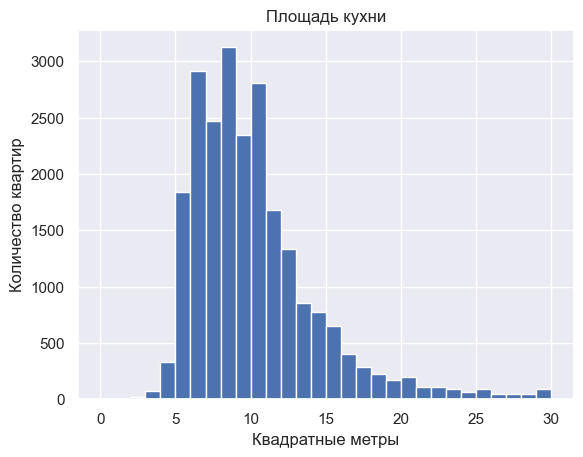

Наибольшие по площади кухни квартиры:
19540    112.000000
20215    107.000000
2489     100.700000
5358     100.000000
16239     93.200000
16797     93.000000
15016     87.537299
10867     87.200000
9826      86.504359
492       77.000000
Name: kitchen_area, dtype: float64


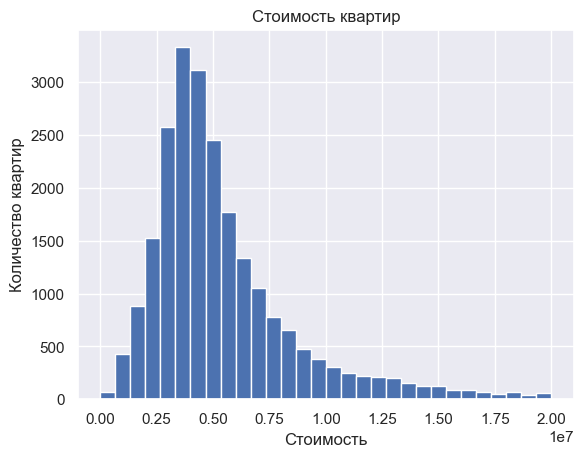

Наибольшие по цене квартиры:
12971    763000000
19540    420000000
14706    401300000
1436     330000000
15651    300000000
22831    289238400
16461    245000000
13749    240000000
5893     230000000
8900     190870000
Name: last_price, dtype: int32


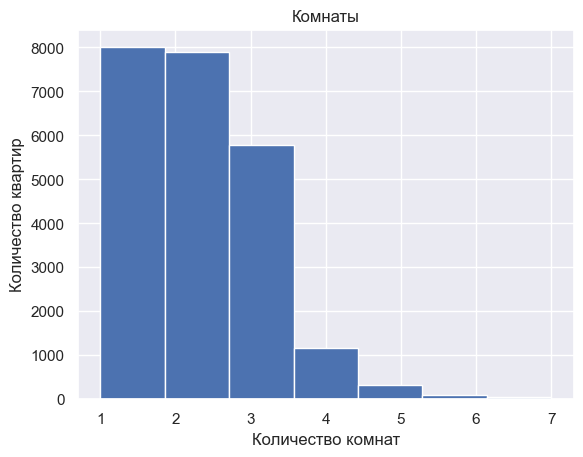

Наибольшие по числу комнат квартиры:
14498    19
18848    16
5358     15
20829    14
866      14
19540    12
648      11
9688     11
18891    10
18119    10
Name: rooms, dtype: int64


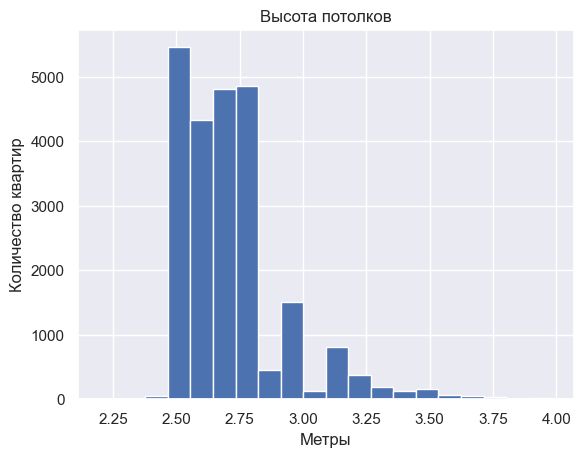

Наибольшие по высоте потолков квартиры:
15061    14.0
22309    10.3
22869    10.0
5863      8.3
17442     8.0
15743     8.0
3474      8.0
20264     6.0
21227     5.8
1388      5.6
Name: ceiling_height, dtype: float64


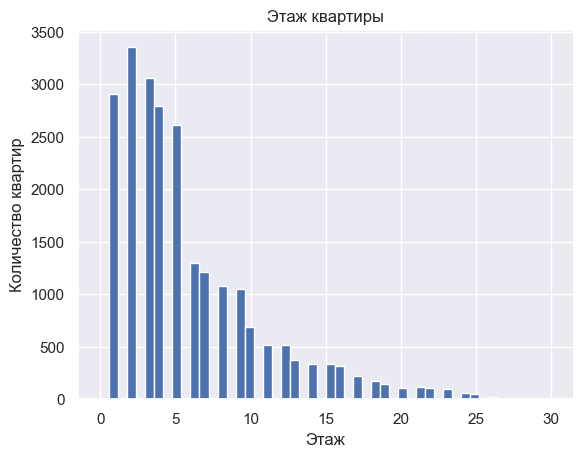

Наибольшие по этажности квартиры:
18218    33
11575    32
18629    31
1917     30
11079    29
397      28
12888    27
16644    27
23292    27
4091     27
Name: floor, dtype: int64


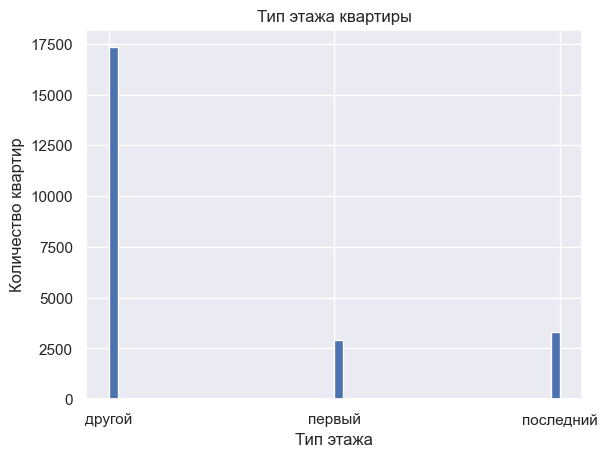

Наибольшие по типу этажности квартиры:
6813     последний
17303    последний
3054     последний
8675     последний
17284    последний
3060     последний
3063     последний
8669     последний
3067     последний
17290    последний
Name: floor_type, dtype: object


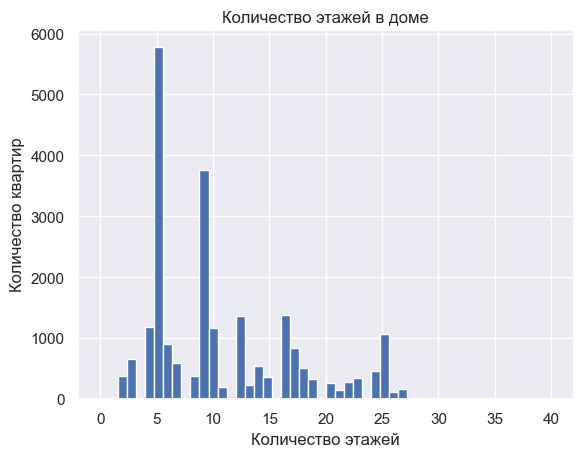

Наибольшие по количеству этажей в доме квартиры:
2253     60.0
16731    52.0
16934    37.0
5807     36.0
11079    36.0
397      36.0
13975    35.0
2966     35.0
9186     35.0
1917     35.0
Name: floors_total, dtype: float64


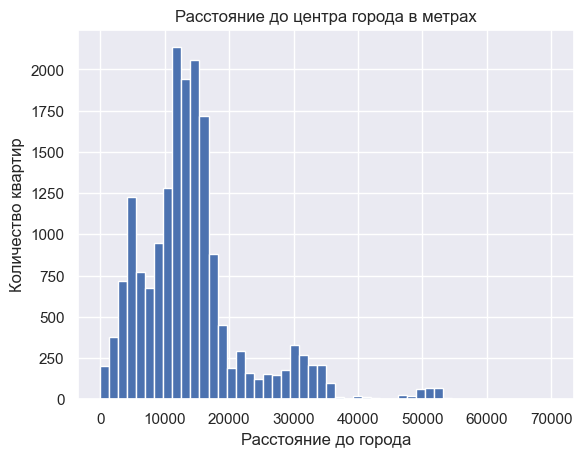

Наибольшие по расстоянию до центра квартиры:
9640     65968.0
5340     65952.0
577      65764.0
20746    65105.0
5218     64857.0
18884    62706.0
2974     62454.0
16569    61495.0
23123    60223.0
4441     59626.0
Name: cityCenters_nearest, dtype: float64


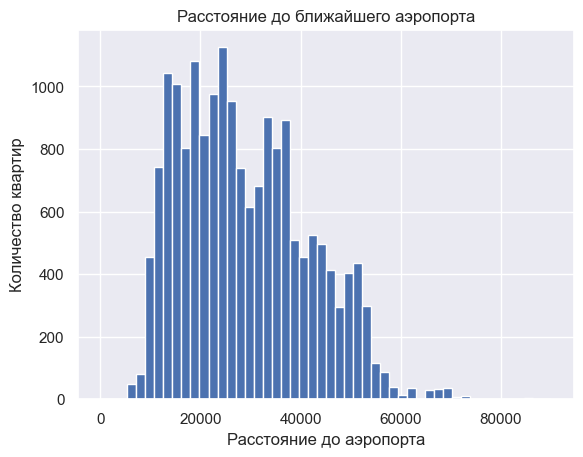

Наибольшие по расстоянию до ближайшего аэропорта квартиры:
9640     84869.0
5340     84853.0
577      84665.0
20746    84006.0
5218     83758.0
18884    81607.0
2974     81355.0
4441     78527.0
939      75646.0
376      73827.0
Name: airports_nearest, dtype: float64


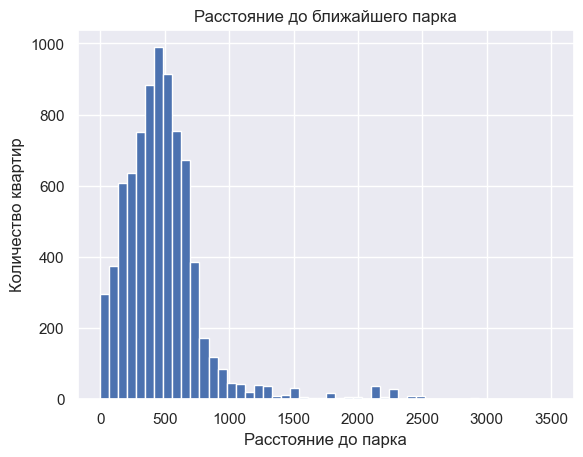

Наибольшие по расстоянию до ближайшего парка квартиры:
10959    3190.0
19430    3190.0
1590     3064.0
19208    3013.0
23080    2984.0
2659     2905.0
1860     2888.0
7855     2880.0
3865     2847.0
22003    2768.0
Name: parks_nearest, dtype: float64


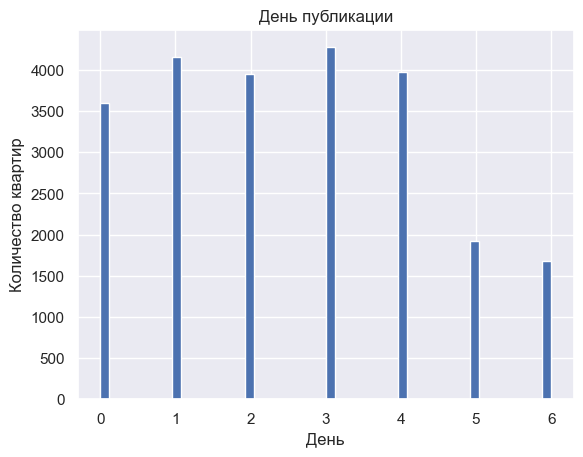

Наибольшие по дню публикации квартиры:
17934    6
17586    6
17636    6
2364     6
9531     6
17615    6
17593    6
2375     6
17587    6
9541     6
Name: weekday, dtype: int64


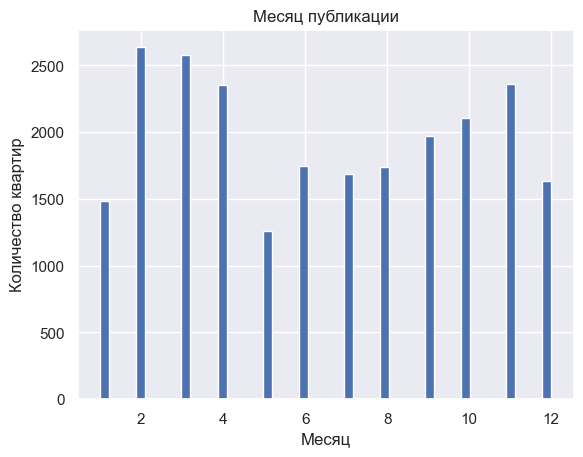

Наибольшие по месяцу публикации квартиры:
15390    12
12621    12
4829     12
4823     12
4819     12
22812    12
7495     12
18761    12
17948    12
7500     12
Name: month, dtype: int64


In [8]:
# Общая площадь
plt.hist(data['total_area'], bins=30, range=(10,200))
plt.title('Общая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по общей площади квартиры:')
print(data['total_area'].sort_values(ascending=False).head(10))

# Жилая площадь
plt.hist(data['living_area'], bins=70, range=(10,80))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по жилой площади квартиры:')
print(data['living_area'].sort_values(ascending=False).head(10))

# Площадь кухни
plt.hist(data['kitchen_area'], bins=30, range=(0,30))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади кухни квартиры:')
print(data['kitchen_area'].sort_values(ascending=False).head(10))

# Стоимость
plt.hist(data['last_price'], bins=30, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по цене квартиры:')
print(data['last_price'].sort_values(ascending=False).head(10))

# Комнаты
plt.hist(data['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по числу комнат квартиры:')
print(data['rooms'].sort_values(ascending=False).head(10))

# Высота потолков
plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по высоте потолков квартиры:')
print(data['ceiling_height'].sort_values(ascending=False).head(10))

# Этаж квартиры
plt.hist(data['floor'], bins=50, range=(0,30))
plt.title('Этаж квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по этажности квартиры:')
print(data['floor'].sort_values(ascending=False).head(10))

# Тип этажа квартиры
plt.hist(data['floor_type'], bins=50)
plt.title('Тип этажа квартиры')
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по типу этажности квартиры:')
print(data['floor_type'].sort_values(ascending=False).head(10))

# Количество этажей в доме
plt.hist(data['floors_total'], bins=50, range=(0,40))
plt.title('Количество этажей в доме')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по количеству этажей в доме квартиры:')
print(data['floors_total'].sort_values(ascending=False).head(10))

# Расстояние до центра города в метрах
plt.hist(data['cityCenters_nearest'], bins=50, range=(0,70000))
plt.title('Расстояние до центра города в метрах')
plt.xlabel('Расстояние до города')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по расстоянию до центра квартиры:')
print(data['cityCenters_nearest'].sort_values(ascending=False).head(10))

# Расстояние до ближайшего аэропорта
plt.hist(data['airports_nearest'], bins=50, range=(0,90000))
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние до аэропорта')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по расстоянию до ближайшего аэропорта квартиры:')
print(data['airports_nearest'].sort_values(ascending=False).head(10))

# Расстояние до ближайшего парка
plt.hist(data['parks_nearest'], bins=50, range=(0,3500))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние до парка')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по расстоянию до ближайшего парка квартиры:')
print(data['parks_nearest'].sort_values(ascending=False).head(10))

# День публикации объявления
plt.hist(data['weekday'], bins=50, range=(0,6))
plt.title('День публикации')
plt.xlabel('День')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по дню публикации квартиры:')
print(data['weekday'].sort_values(ascending=False).head(10))

# Месяц публикации объявления
plt.hist(data['month'], bins=50, range=(1,12))
plt.title('Месяц публикации')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по месяцу публикации квартиры:')
print(data['month'].sort_values(ascending=False).head(10))

**Вывод:**

**Площадь**

Большинство квартир - менее 100 квадратных метров. В подборке есть несколько очень больших и странных вариантов с площадью более 200 квадратных метров.

**Жилая площадь**
Самые распространённые варианты с жилой площадью от 10 до 50 метров. В подборке есть несколько очень больших и странных вариантов с жилой площадью более 80 квадратных метров. Два пика графика вызваны, вероятно, тем, что это жилые площади для 1-комнатной, затем для 2-комнатной и после этого для 3-комнатной квартиры.

**Площадь кухни**

Самые распространённые кухни - от 5 до 20 метров. Больше 20 метров кухни практически не встречаются. Больше 30 - единичные случаи. В подборке есть несколько очень больших вариантов с площадью кухни более 30 квадратных метров.

**Стоимость**

В основном стоимость квартир - порядка 7,5 миллионов. Больше 20 миллионов вариантов мало и они выглядят подозрительно и некоторые гораздо дороже.

**Комнаты**

В основном квартиры состоят из 1, 2 и 3 комнат. Есть небольшая доля 4-комнатных квартир. Варианты, где больше 7 комнат выглядят подозрительно. Даже при объединении нескольких квартир в одну это подозрительно. Возможно, это отдельный дом, гостевой дом, мини-отель и т.д.

**Высота потолков**

Большинство вариантов имеют высоту потолков от 2,5 до 2,75 метров. Есть небольшая доля квартир с 3-х метровыми потолками. Больше 4 метров высота потолков выглядит подозрительно. Есть значения в 10 метров, может быть ошибкой данных.

**Этаж квартиры**

Большинство вариантов расположены до 10 этажа. Есть небольшая доля квартир выше 25 этажа.

**Тип этажа**

Большинство вариантов расположены между первым и последним этажем. Доля квартир на первом и последнем этаже практически равны.

**Количество этажей в доме**

Самые распространённые варианты по количеству этажей в доме имеют 5 и 10 этажей. В подборке есть несколько меньших пиков в 12, 17, 25, вероятно дома новой постройки. Больше 30 этажей домов практически не встречается.

**Расстояние до центра города**

Большинство вариантов расположены в пределах 20000 метров (20 км) до центра.Квартиры с расстоянием выше 40000 метров (40 км) практически не встречаются.

**Расстояние до ближайшего аэропорта**

Большинство вариантов расположены в пределах от 10000 метров (10 км) до 50000 метров (50 км). Квартиры с расстоянием выше 55000 метров (55 км) практически не встречаются.

**Расстояние до ближайшего парка**

Большинство вариантов расположены в пределах 700 метров до ближайшего парка. Квартиры с расстоянием выше 1000 метров (1 км) практически не встречаются.

**День публикации**

Большинство вариантов опубликованы в будние дни, наиболее активными днями являются понедельник и среда.

**Месяц публикации**

Большинство вариантов опубликованы в феврале, марте и апреле. Далее идет спад активности до августа, после активность публикаций растет до декабря.


#### Изучение времени продажи квартиры

Время продажи (медиана): 95 

Время продажи (среднее): 181 



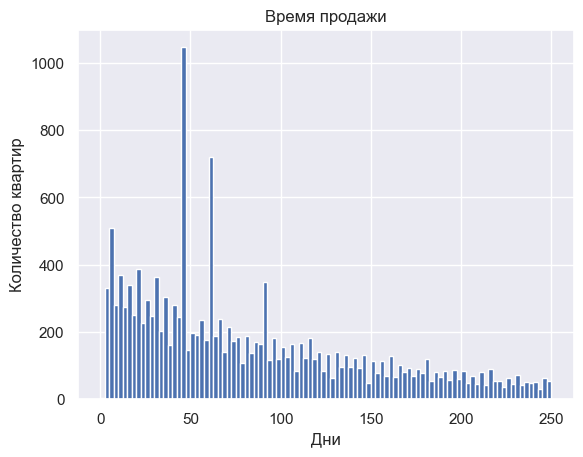

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [9]:
# Отбрасываем маркеры пустых значений
print('Время продажи (медиана):', round(data.query('days_exposition != 9999')['days_exposition'].median()),'\n')
print('Время продажи (среднее):', round(data.query('days_exposition != 9999')['days_exposition'].mean()),'\n')
# Гистограма времени продажи
plt.hist(data.query('days_exposition != 9999')['days_exposition'], bins=100, range=(0,250))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()
# Изучаем значения срока продажи
data.query('days_exposition != 9999')['days_exposition'].describe()

**Вывод:**

* Медианное время продажи - 95 дней
* Среднее время продажи - 181 день
* В основном квартиры продаются за срок в 95 дней. Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались около 10 месяцев

#### Определение факторов, влияющих на стоимость объекта

In [10]:
# Обработаем выбросы

# Функция для подсчёта границ с учетом 1.5 размаха
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq
# Столбцы с выбросами
list_features = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
for col in list_features:
    data[col] = quartile_range(data, col)

# Возвращаем в целочисленный тип число комнат
data['rooms'] = data['rooms'].fillna(0).astype(int)

# Изучаем, есть ли выбивающиеся значения
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_metr,weekday,month,year,center_km
count,23565.000000,2.151900e+04,22326.000000,23565.000000,22136.000000,23565.000000,22682.000000,23565.000000,22250.000000,23565.000000,18041.000000,18064.000000,23565.000000,8030.000000,23565.000000,9036.000000,19996.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000
mean,9.878421,4.837115e+06,54.319704,2.013495,2.683866,10.675875,31.526984,5.878124,9.417840,0.593677,28797.082701,14192.656056,0.468831,490.580448,0.589900,518.289509,162.414783,9.940539e+04,2.567367,6.401570,2017.371016,10.498960
std,5.681156,2.215774e+06,19.331030,0.986750,0.153383,6.594823,13.752739,4.871485,3.177523,0.960660,12632.499735,8613.348153,0.748403,341.572956,0.883966,278.009558,177.715098,5.038944e+04,1.788279,3.492948,1.037393,9.512143
min,0.000000,1.219000e+04,12.000000,0.000000,2.250000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.110000e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.300000e+06,39.400000,1.000000,2.560000,5.000000,18.700000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,44.000000,7.656600e+04,1.000000,3.000000,2017.000000,2.000000
50%,9.000000,4.400000e+06,50.000000,2.000000,2.671458,9.000000,30.000000,4.000000,9.000000,0.000000,26757.000000,13096.500000,0.000000,455.000000,0.000000,503.000000,92.000000,9.500000e+04,3.000000,6.000000,2017.000000,11.000000
75%,14.000000,6.000000e+06,65.500000,3.000000,2.751707,16.000000,40.600000,8.000000,11.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,217.000000,1.142130e+05,4.000000,10.000000,2018.000000,15.000000
max,50.000000,1.186686e+07,114.200000,5.000000,3.140000,60.000000,76.700000,33.000000,19.450000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,907.000000,1.907500e+06,6.000000,12.000000,2019.000000,65.000000


**Вывод:** В датафрейме отброшены значения на основе 1.5 размаха.

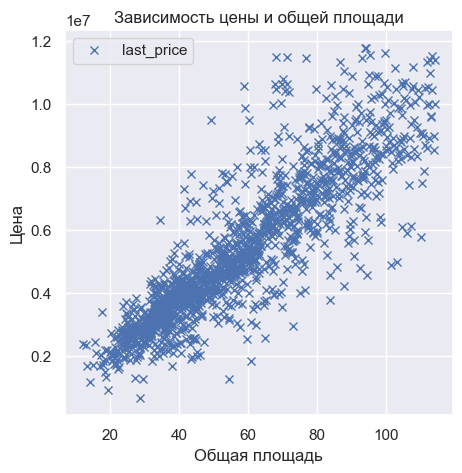

Корреляция цены и общей площади: 

            last_price  total_area
last_price    1.000000    0.905372
total_area    0.905372    1.000000 



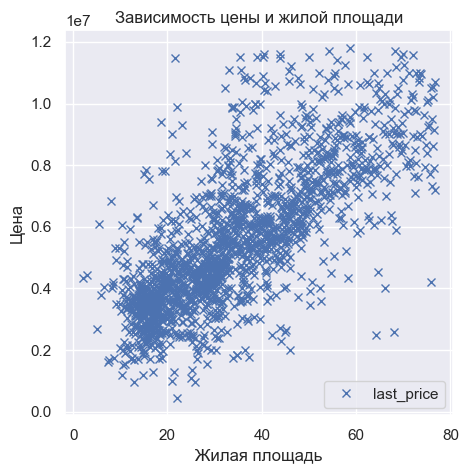

Корреляция цены и жилой площади: 

             last_price  living_area
last_price     1.000000     0.729359
living_area    0.729359     1.000000 



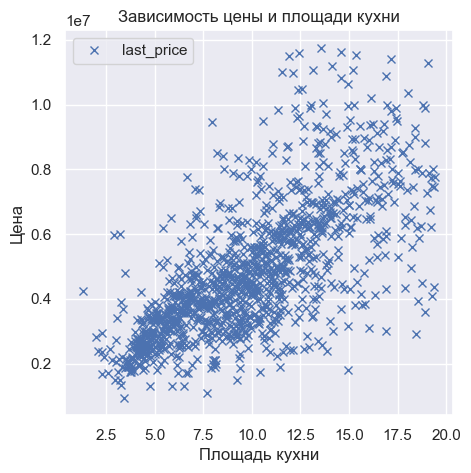

Корреляция цены и площади кухни: 

              kitchen_area  last_price
kitchen_area      1.000000    0.445313
last_price        0.445313    1.000000 



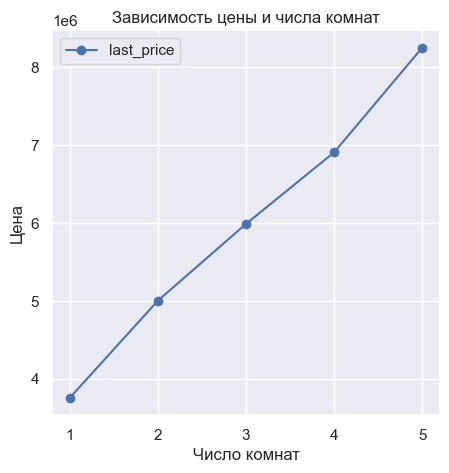

Корреляция цены и числа комнат: 

            last_price     rooms
last_price    1.000000  0.537551
rooms         0.537551  1.000000 



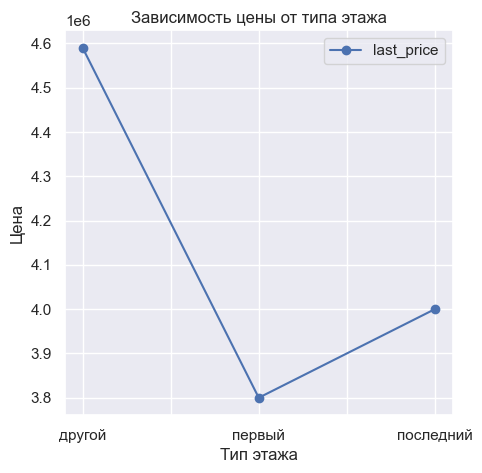

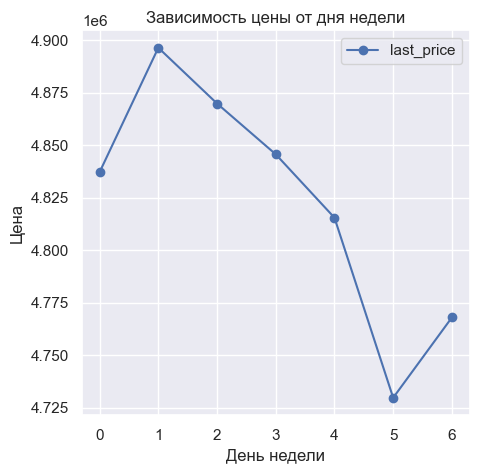

Корреляция цены и дня недели: 

            last_price   weekday
last_price    1.000000 -0.011496
weekday      -0.011496  1.000000 



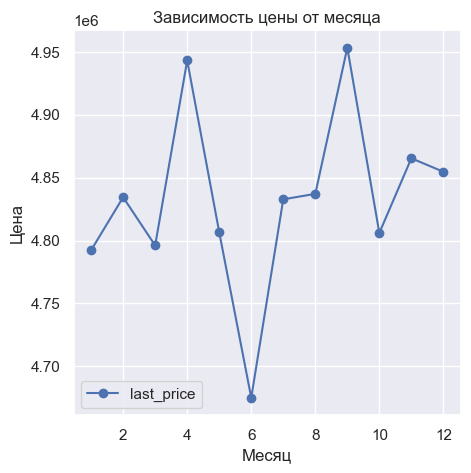

Корреляция цены и месяца: 

            last_price     month
last_price    1.000000 -0.400261
month        -0.400261  1.000000 



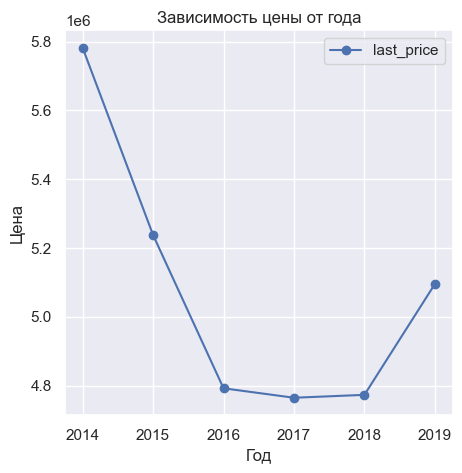

Корреляция цены и года: 

            last_price     year
last_price     1.00000 -0.64344
year          -0.64344  1.00000 



In [11]:
def analyze_data(data):
    # Зависимость цены от общей площади
    data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='x', figsize=(5, 5))
    plt.title('Зависимость цены и общей площади')
    plt.ylabel('Цена')
    plt.xlabel('Общая площадь')
    plt.show()
    print('Корреляция цены и общей площади:','\n')
    print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')

    # Зависимость цены от жилой площади
    data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='x', figsize=(5, 5))
    plt.title('Зависимость цены и жилой площади')
    plt.ylabel('Цена')
    plt.xlabel('Жилая площадь')
    plt.show()
    print('Корреляция цены и жилой площади:','\n')
    print(data.pivot_table(index='floor', values=['living_area', 'last_price']).corr(),'\n')

    # Зависимость цены от площади кухни
    data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='x', figsize=(5, 5))
    plt.title('Зависимость цены и площади кухни')
    plt.ylabel('Цена')
    plt.xlabel('Площадь кухни')
    plt.show()
    print('Корреляция цены и площади кухни:','\n')
    print(data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr(),'\n')

    # Зависимость цены от числа комнат
    data.query('rooms > 0').pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
    plt.title('Зависимость цены и числа комнат')
    plt.ylabel('Цена')
    plt.xlabel('Число комнат')
    plt.show()
    print('Корреляция цены и числа комнат:','\n')
    print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

    # Зависимость цены от типа этажа
    data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))
    plt.title('Зависимость цены от типа этажа')
    plt.ylabel('Цена')
    plt.xlabel('Тип этажа')
    plt.show()

    # Зависимость цены от дня недели
    data.pivot_table(index='weekday', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
    plt.title('Зависимость цены от дня недели')
    plt.ylabel('Цена')
    plt.xlabel('День недели')
    plt.show()
    print('Корреляция цены и дня недели:','\n')
    print(data.query('weekday').pivot_table(index='floor', values=['weekday', 'last_price']).corr(),'\n')

    # Зависимость цены от месяца
    data.pivot_table(index='month', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
    plt.title('Зависимость цены от месяца')
    plt.ylabel('Цена')
    plt.xlabel('Месяц')
    plt.show()
    print('Корреляция цены и месяца:','\n')
    print(data.query('month').pivot_table(index='floor', values=['month', 'last_price']).corr(),'\n')

    # Зависимость цены от года
    data.pivot_table(index='year', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
    plt.title('Зависимость цены от года')
    plt.ylabel('Цена')
    plt.xlabel('Год')
    plt.show()
    print('Корреляция цены и года:','\n')
    print(data.query('year').pivot_table(index='floor', values=['year', 'last_price']).corr(),'\n')

analyze_data(data)

**Вывод:**

* Чем больше **общая площадь**, тем выше стоимость. Корреляция этих параметров высокая. При этом корреляция по **жилой площади** не такая высокая, то также имеется зависимость, как и с **площадью кухни**. Число комнат влияет на цену (больше комнат - больше цена), однако зависимость ниже, чем у площадей. Можно сделать два вывода: бывают квартиры с большими по площади комнатами; квартиры в центре состоят из малого числа комнат, но стоят достаточно высоко
* **Тип этажа** непосредственно влияет на стоимость квартиры - квартиры на 1-м этаже дешевле, немного дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже
* **День недели:** дороже всего квартиры, опубликованные в среду, дешевле всего - в субботу
* **Месяц:** дороже всего квартиры, опубликованные в апреля, дешевле всего в июне
* **Год:** квартиры очень сильно стали дешевле в 2016-2018 годах, вероятно это вызвано некоторым кризисом 2014-2015 годов. В 2019 году цены снова стали повышаться, т.к. экономика и зарплаты улучшились

#### Сравнение средней стоимости квадратного метра в топ-10 городов

,price_one_metr
locality_name,
Санкт-Петербург,114868
Пушкин,103125
деревня Кудрово,92473
поселок Парголово,90175
поселок Мурино,85629
поселок Шушары,78550
Колпино,75424
Гатчина,68745
Всеволожск,68654


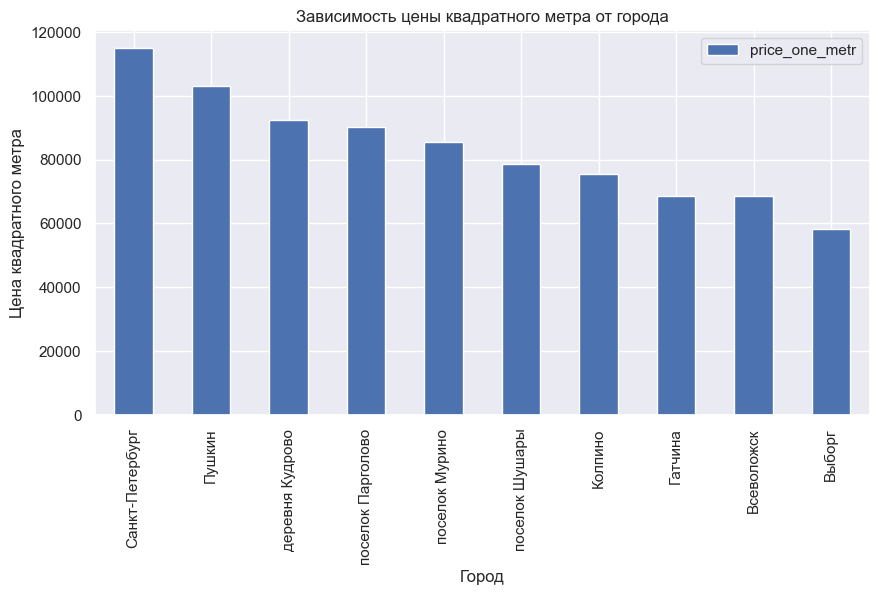

In [12]:
# Сравниваем среднюю стоимость квадратного метра в топ-10 городов по числу объявлений
city_top = data['locality_name'].value_counts().head(10)
city_price_one_metr = data.query('locality_name in (@city_top.index)').pivot_table(index='locality_name', values='price_one_metr')
city_price_one_metr = city_price_one_metr.astype(int)
display(city_price_one_metr.sort_values('price_one_metr', ascending=False))
city_price_one_metr.sort_values('price_one_metr', ascending=False).plot(kind='bar', figsize=(10,5))
plt.title('Зависимость цены квадратного метра от города')
plt.ylabel('Цена квадратного метра')
plt.xlabel('Город')
plt.show() 

**Вывод:** Наибольшая средняя стоимость квадратного метра, как и ожидалось, в Санкт-Петербурге. Затем идёт Пушкин, что скорей всего вызвано хорошей застройкой и большим количеством парков. Затем идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкают. Из топ-10 наименьшая стоимость в Гатчине и Всеволожске, из которых далеко ехать до Санкт-Петербурга, а также неболшой по численности населения Выборг, расположенный на большом расстоянии от Санкт-Петербурга.

#### Средняя цена каждого километра

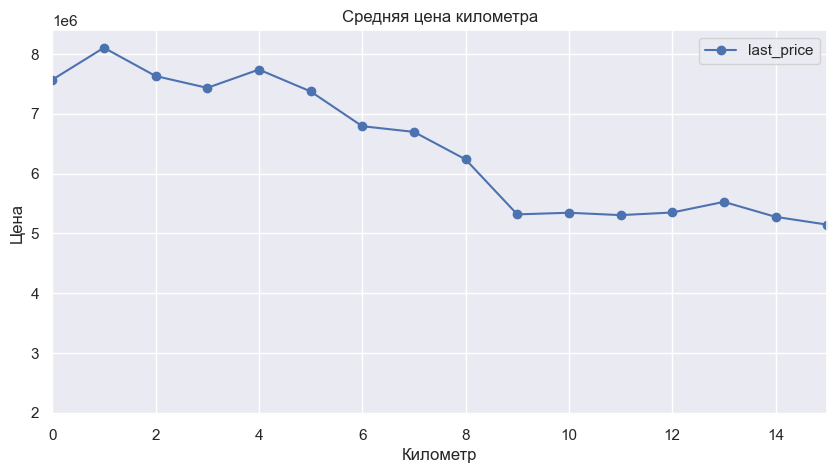

In [13]:
# Выбираем Санкт-Петербург, смотрим на график, где указана средняя стоимость для каждого км
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='center_km', values='last_price').plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
plt.title('Средняя цена километра')
plt.ylabel('Цена')
plt.xlabel('Километр')
plt.show()

Определим центральную зону города как 7 км и меньше, т.к. дальше 7 км средняя цена на квартиры резко снижается.

Общая площадь (медиана): 52 

Общая площадь в центре (медиана): 68 

Общая площадь (среднее): 56 

Общая площадь в центре (среднее): 69 



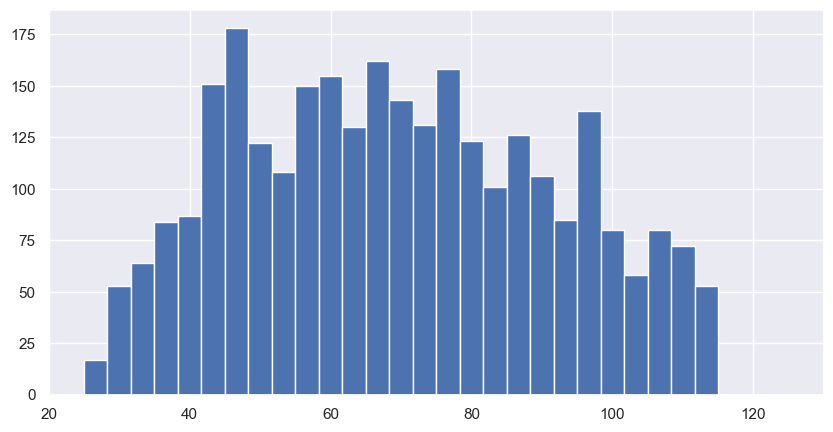

Число квартир с ценой больше 20 млн: 0


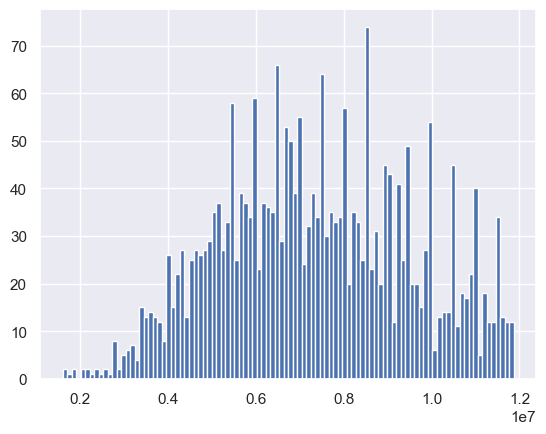

,count,rooms_ratio,center_count,center_rooms_ratio,center_cap
rooms,,,,,
1,4912,31.985414,579,16.164154,12.0
2,5082,33.092401,1119,31.239531,22.0
3,4107,26.743505,1161,32.412060,28.0
4,966,6.290291,503,14.042434,52.0
5,290,1.888390,220,6.141820,76.0


Высота потолков (медиана): 2.7 

Высота потолков в центре (медиана): 2.8195534838076544 

Высота потолков (среднее): 2.7091797867676854 

Высота потолков в центре (среднее): 2.848259786576253 



In [14]:
spb_center = data.query('(locality_name == "Санкт-Петербург") & (center_km <= 7)')

# Изучаем площадь
print('Общая площадь (медиана):', round(data.query('locality_name == "Санкт-Петербург"')['total_area'].median()),'\n')
print('Общая площадь в центре (медиана):', round(spb_center['total_area'].median()),'\n')
print('Общая площадь (среднее):', round(data.query('locality_name == "Санкт-Петербург"')['total_area'].mean()),'\n')
print('Общая площадь в центре (среднее):', round(spb_center['total_area'].mean()),'\n')
spb_center['total_area'].hist(bins=30, range=(25,125), figsize=(10,5))
plt.show()

# Работаем со стоимостью
spb_center['last_price'].hist(bins=100)
print('Число квартир с ценой больше 20 млн:', spb_center.query('last_price > 20000000')['last_price'].count())
plt.show()

# Добавляем столбец с отношением жилой площади к общей (area_ratio), переводим в % и приводим его в целочисленный тип
data['area_ratio'] = data['living_area'] / data['total_area'] * 100
data['area_ratio'] = data['area_ratio'].fillna(value=0).astype(int)

# Добавляем столбец с отношением площади кухни к общей (kitchen_ratio), переводим в % и приводим его в целочисленный тип
data['kitchen_ratio'] = data['kitchen_area'] / data['total_area'] * 100
data['kitchen_ratio'] = data['kitchen_ratio'].fillna(value=0).astype(int)

# Изучаем число комнат
spb_rooms = data.query('(locality_name == "Санкт-Петербург") & (rooms > 0)').pivot_table(index='rooms', values='floor', aggfunc='count')
spb_rooms.columns = ['count']
spb_rooms['rooms_ratio'] = spb_rooms['count'] / spb_rooms['count'].sum() * 100
spb_rooms_center = data.query('(locality_name == "Санкт-Петербург") & (center_km <= 7)  & (rooms > 0)').pivot_table(index='rooms', values='floor', aggfunc='count')
spb_rooms_center.columns = ['center_count']
spb_rooms_center['center_rooms_ratio'] = spb_rooms_center['center_count'] / spb_rooms_center['center_count'].sum() * 100
rooms_alldata = pd.merge(spb_rooms, spb_rooms_center, 'left', on = 'rooms')
rooms_alldata['center_cap'] = round(rooms_alldata['center_count'] / rooms_alldata['count'] * 100)
display(rooms_alldata)

# Изучаем высоту потолков
print('Высота потолков (медиана):', data.query('locality_name == "Санкт-Петербург"')['ceiling_height'].median(),'\n')
print('Высота потолков в центре (медиана):', spb_center['ceiling_height'].median(),'\n')
print('Высота потолков (среднее):', data.query('locality_name == "Санкт-Петербург"')['ceiling_height'].mean(),'\n')
print('Высота потолков в центре (среднее):', spb_center['ceiling_height'].mean(),'\n')

**Вывод:**

* Площадь квартир в центре значительно больше, чем в целом по городу - в среднем на 13-14 метров. Также в центре находится большое число квартир с огромной площадью (100 квадратных метров и более)
* Комнаты: В центре в два раза ниже доля однокомнатных квартир (16 %), чем в среднем по городу (32 %). Половина четырёхкомнатных квартир находится в центре города (52 %), их доля в два раза выше, чем в среднем по городу (6 %). Большинство квартир с 5 комнатами и более находятся в центре города
* Высота потолков в центре выше в среднем на 12 сантиметров.

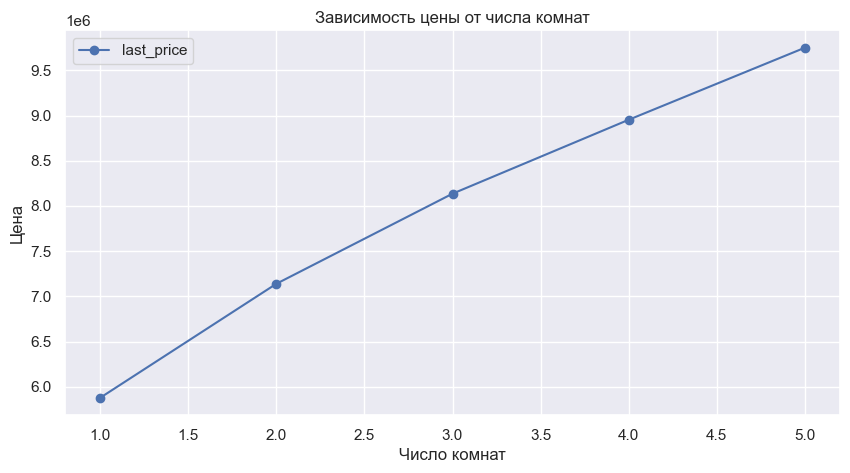

Корреляция цены и числа комнат: 

            last_price     rooms
last_price    1.000000 -0.137141
rooms        -0.137141  1.000000 



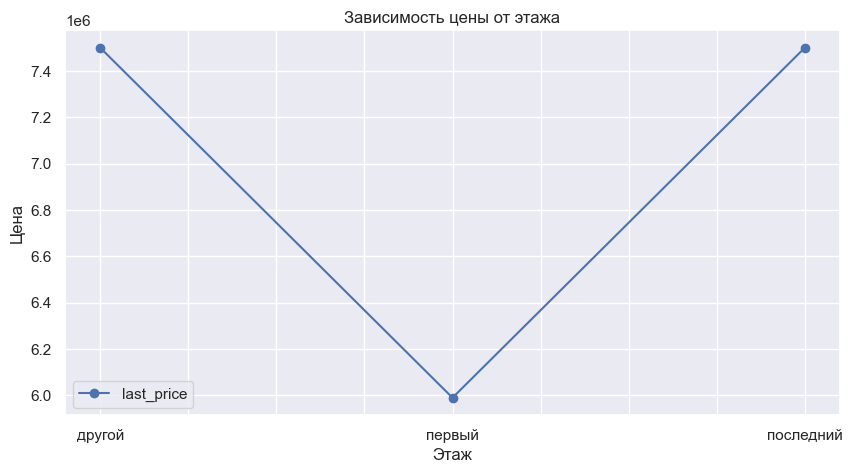

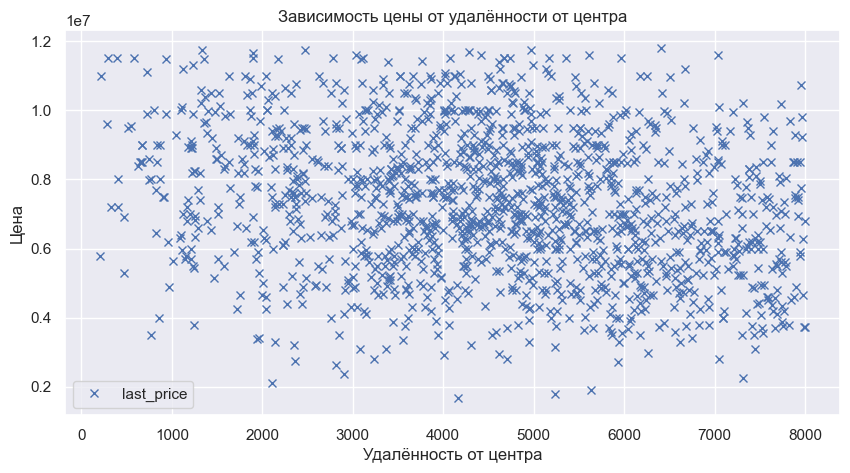

Корреляция цены и удалённости от центра: 

                     cityCenters_nearest  last_price
cityCenters_nearest             1.000000    0.124077
last_price                      0.124077    1.000000 



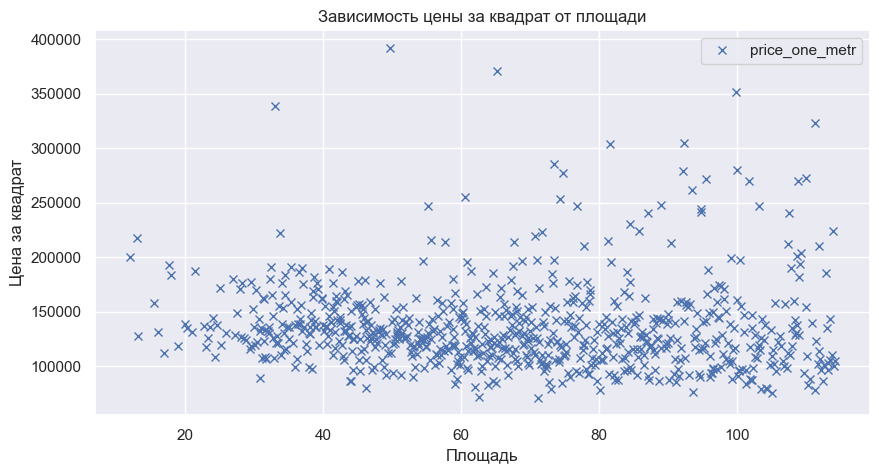

Корреляция цены за квадрат и площади: 

                price_one_metr  total_area
price_one_metr        1.000000   -0.012519
total_area           -0.012519    1.000000 



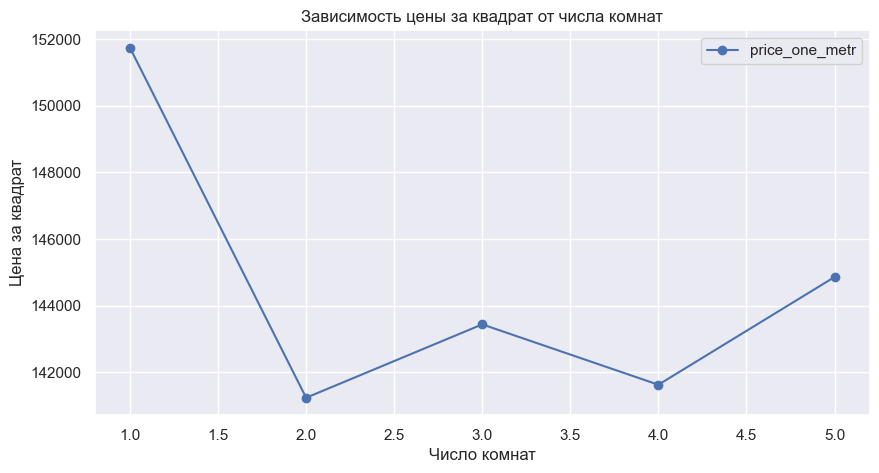

Корреляция цены за квадрат и числа комнат: 

                price_one_metr     rooms
price_one_metr        1.000000 -0.046032
rooms                -0.046032  1.000000 



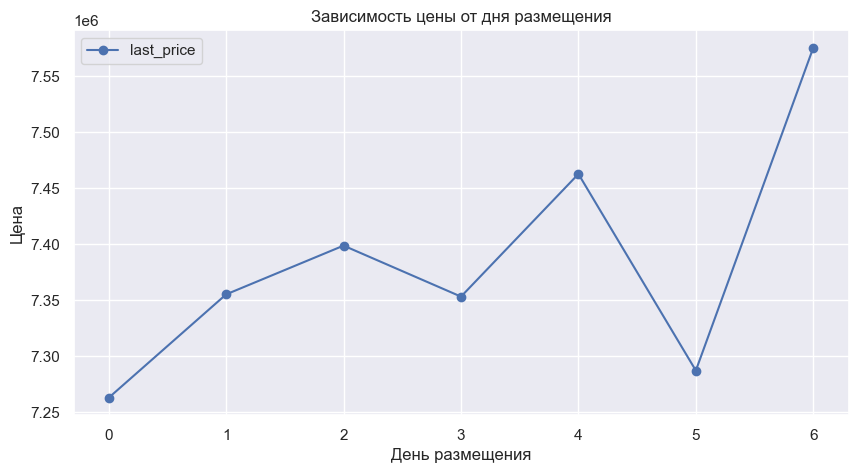

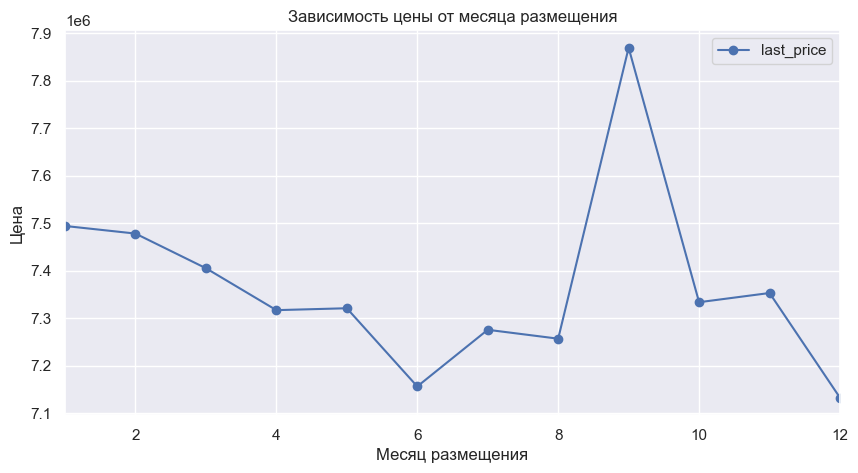

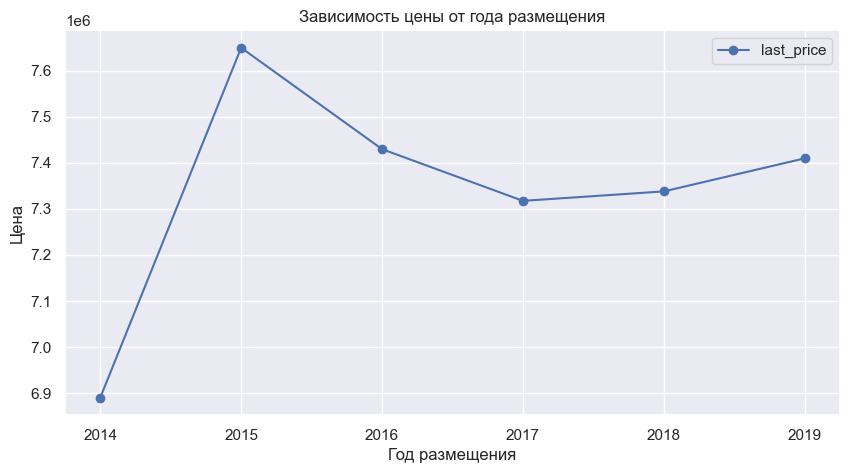

In [15]:
def analyze_real_estate_data(data):
    # Зависимость цены от числа комнат
    data.query('(rooms > 0) & (rooms < 7)').pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(10, 5))
    plt.title('Зависимость цены от числа комнат')
    plt.ylabel('Цена')
    plt.xlabel('Число комнат')
    plt.show()
    print('Корреляция цены и числа комнат:','\n')
    print(data.query('(rooms > 0) & (rooms < 7)').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

    # Зависимость цены от этажа
    data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(10, 5))
    plt.title('Зависимость цены от этажа')
    plt.ylabel('Цена')
    plt.xlabel('Этаж')
    plt.show()

    # Зависимость цены от удалённости от центра
    data.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='median').plot(grid=True, style='x', figsize=(10, 5))
    plt.title('Зависимость цены от удалённости от центра')
    plt.ylabel('Цена')
    plt.xlabel('Удалённость от центра')
    plt.show()
    print('Корреляция цены и удалённости от центра:','\n')
    print(data.pivot_table(index='floor', values=['cityCenters_nearest', 'last_price']).corr(),'\n')

    # Зависимость цены за квадрат от площади
    data.pivot_table(index='total_area', values='price_one_metr').plot(grid=True, style='x', figsize=(10, 5))
    plt.title('Зависимость цены за квадрат от площади')
    plt.ylabel('Цена за квадрат')
    plt.xlabel('Площадь')
    plt.show()
    print('Корреляция цены за квадрат и площади:','\n')
    print(data.pivot_table(index='floor', values=['total_area', 'price_one_metr']).corr(),'\n')

    # Зависимость цены за квадрат от числа комнат
    data.query('rooms > 0').pivot_table(index='rooms', values='price_one_metr').plot(grid=True, style='o-', figsize=(10, 5))
    plt.title('Зависимость цены за квадрат от числа комнат')
    plt.ylabel('Цена за квадрат')
    plt.xlabel('Число комнат')
    plt.show()
    print('Корреляция цены за квадрат и числа комнат:','\n')
    print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'price_one_metr']).corr(),'\n')

    # Зависимость цены от дня размещения
    data.pivot_table(index='weekday', values='last_price').plot(grid=True, style='o-', figsize=(10, 5))
    plt.title('Зависимость цены от дня размещения')
    plt.ylabel('Цена')
    plt.xlabel('День размещения')
    plt.show()

    # Зависимость цены от месяца размещения
    data.pivot_table(index='month', values='last_price').plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
    plt.title('Зависимость цены от месяца размещения')
    plt.ylabel('Цена')
    plt.xlabel('Месяц размещения')
    plt.show()

    # Зависимость от года размещения
    data.pivot_table(index='year', values='last_price').plot(grid=True, style='o-', figsize=(10, 5))
    plt.title('Зависимость цены от года размещения')
    plt.ylabel('Цена')
    plt.xlabel('Год размещения')
    plt.show()

analyze_real_estate_data(spb_center)

**Вывод:**

* Зависимость цены квартиры от числа комнат в центре такая же, как и в целом по городу
* В центре верхний этаж стоит практически столько же, сколько и другие этажи, кроме первого
* В центре есть очень дорогие однокомнатные квартиры
* В центральной зоне почти нет зависимости от удалённости от центра города. Стоимость даже немного повышается при удалении от центра
* В центре значительно выше стоимость квартир, опубликованных в субботу и в декабре
* Стоимость квартир в центре значительно выросла в 2015 году и снизилась только в 2017 году. Это сложно объяснить, т.к. стоимость менее элитной недвижимости упала после обвала рубля в 2014 году

### ВЫВОД

**Срок продажи квартиры**

* Чаще всего квартиру продают за 95 дней. Если меньше 45 дней, то это быстро, если дольше 230 дней - это долго
* Есть большое число квартир, проданных всего за несколько дней после публикации
* Также есть варианты, которые продавались около 10 месяцев

**Факторы, влияющие на стоимость**

* На стоимость больше влияет площадь квартиры, нежели число комнат. Т.е. могут быть дорогие квартиры с малым числом комнат, но где комнаты просторные
* Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого

**Стоимость квадратного метра в топ-10 населённых пунктов**

* Дороже всего квадратный метр в Санкт-Петербурге - 114848
* Дешевле всего квадратный метр в Выборге - 58141

**Факторы, влияющие на стоимость в центре Санкт-Петербурга**

* В центре города практически нет разницы, насколько квартира удалена от условного центра города
* В центре города последний этаж практически не влияет на стоимость квартиры, в отличие от остального города
* В центре есть очень дорогие однокомнатные квартиры
* Экономическая ситуация в стране мало влияет на элитную недвижимость в центре